# Training a binary classifier with the IMDB Reviews Dataset
In this notebook, I will be building a sentiment classification model to distinguish between positive and negative movie reviews. I will train it on the IMDB Reviews dataset and visualize the word embeddings generated after training.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised= True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB0YPKE/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB0YPKE/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB0YPKE/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
   

## Configuration

In [ ]:
VOCAB_SIZE = 10000
MAX_LENGTH = 120
EMBEDDING_DIM = 16
TRUNC_TYPE = 'post'
OOV_TOK = "<OOV>"

## Split the dataset
when I printed the `imdb` dataset that I downloaded earlier, I saw the dictionary that ppoints to `tf.data.Dataset` objects. 

In [ ]:
print(imdb)

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [ ]:
# Take 2 training examples and print its contents
for example in imdb['train'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [ ]:
# Take 2 testing examples and print its contents
for example in imdb['test'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.">, <tf.Tensor: 

You can see that each example is a 2-element tuple of tensors containing the text first, then the label (shown in the `numpy()` property). The next cell below will take all the `train` and `test` sentences and labels into separate lists so  you can preprocess the text and feed it to the model later.

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# loop over all training examples and save the sentences and labels
for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf-8'))
  testing_labels.append(l.numpy())

# converting labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels) 

In [ ]:
for counter in range(0,10):
  print("Sentence: ", training_sentences[counter], "label: ", training_labels_final[counter])


Sentence:  This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it. label:  0
Sentence:  I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbis

## Generate Padded sequences
Now I can do the text preprocessing steps. I will tokenize the sentences and pad them to a uniform length. 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = OOV_TOK)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = MAX_LENGTH, truncating = TRUNC_TYPE)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = MAX_LENGTH)

In [27]:
len(testing_labels_final)

25000

## Build and Compile the Model
with the data already preprocessed, you can proceed to building your sentiment classification model. The input will be an `Embedding` layer. The main idea here is to represent each word in your vocabulary with vectors. These vectors have trainable weights so as your neural network learns, words that are most likely to appear in apositive tweet will converge towards similar weights. Similarly, words in negative tweets will be clustered more closely together. 

After the `Embedding` layer, you will flatten its output and feed it into a `Dense` layer. 

The output layer would be a single neuron with sigmoid activation to distinguish between the 2 classes. As is typical with binary classifiers, I will use the `binary_crossentropy` as my loss function while training. 

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length = MAX_LENGTH),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


## Train the Model


In [18]:
num_epochs = 10
history =model.fit(padded, training_labels_final, epochs = num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 9s 12ms/step - loss: 9.6898e-05 - accuracy: 1.0000 - val_loss: 0.8369 - val_accuracy: 0.8297
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 6.0537e-05 - accuracy: 1.0000 - val_loss: 0.8705 - val_accuracy: 0.8299
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 3.7733e-05 - accuracy: 1.0000 - val_loss: 0.9062 - val_accuracy: 0.8292
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 2.3829e-05 - accuracy: 1.0000 - val_loss: 0.9395 - val_accuracy: 0.8300
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5055e-05 - accuracy: 1.0000 - val_loss: 0.9748 - val_accuracy: 0.8290
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 9.5320e-06 - accuracy: 1.0000 - val_loss: 1.0087 - val_accuracy: 0.8296
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 6.0676e-06 - accuracy: 1.0000 - val_loss: 1.04

# Visualize word Embeddings
After training, I can visualize the trained weights in the `Embedding` layer to see words that are clustered together. 

In [15]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights)

[[-0.00743746  0.04035481  0.00351726 ... -0.03779939 -0.03573195
  -0.04576129]
 [-0.01935897  0.01052314  0.00931133 ...  0.04803641 -0.01874029
  -0.03051088]
 [ 0.03065591  0.00698228 -0.01185228 ...  0.00718335 -0.03784399
  -0.08174765]
 ...
 [-0.02401949 -0.05760001  0.1287941  ...  0.04015831 -0.04350828
  -0.02639861]
 [-0.1643454  -0.05046148  0.09835508 ...  0.07353052 -0.18877609
  -0.01107683]
 [-0.12217525 -0.18249191 -0.06151686 ...  0.15323631 -0.05166459
  -0.11701769]]


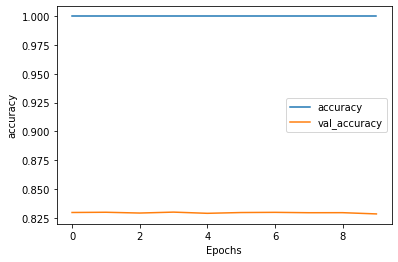

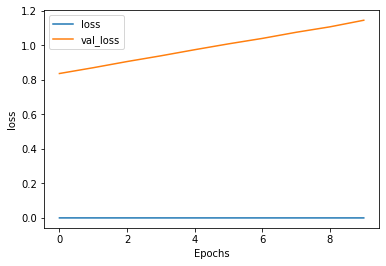

In [25]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history[string])
  plt.plot(history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graph(history.history,"accuracy")
plot_graph(history.history, "loss")

There is overfitting happened

{'loss': [9.68982421909459e-05,
  6.053728429833427e-05,
  3.773327262024395e-05,
  2.382945967838168e-05,
  1.5055469702929258e-05,
  9.531954674457666e-06,
  6.067636149964528e-06,
  3.9398155422532e-06,
  2.4977896373457043e-06,
  1.6680839962646132e-06],
 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.8368707299232483,
  0.8704869747161865,
  0.9062402248382568,
  0.9394814968109131,
  0.9748374819755554,
  1.00874924659729,
  1.0403386354446411,
  1.0758181810379028,
  1.107426643371582,
  1.1456058025360107],
 'val_accuracy': [0.8296800255775452,
  0.8298799991607666,
  0.829200029373169,
  0.8299999833106995,
  0.8289600014686584,
  0.8296399712562561,
  0.829800009727478,
  0.829479992389679,
  0.8295199871063232,
  0.8284400105476379]}